In [20]:
import pandas as pd
import numpy as np
import datetime
import random
import matplotlib.pyplot as plt
import seaborn as sns
from operator import itemgetter

In [21]:
columns = [ "Date", "Mentor", "Qoniqarsiz", "Qoniqarli", "Namunali"]
mentor_name = [ "Azodov Sarvar", "Olloyorov Sirojiddin", "Rasulov Rahmatulloh", "Shomurodov Sarvarbek", "Shukurov Jasur", "Azizova Aziza", "Arslanova Nodira", "Alimbayeva Asalbonu", "Abdulaziz" ]
qoniqarsiz = ["Mentor o'z vaqtida ish joyida yo'q", "Mentor umuman yordam bera olmadi", "Mentor yordam berishdan bosh tortdi"]
qoniqarli = ["Mentor ish joyiga kech keldi", "Mentor savolimga toliq jovob berolmadi", "Mentor javob berdi ammo muomilasizlik blan"]
namunali = ["Mentor barcha savoimga javob berdi", "Mentor juda ham yaxshi tushuntirdi", "Mentor yangicha va qiziqarli usulda taqdimot qilib tushuntirdi"]
baxo = {"Qoniqarsiz":qoniqarsiz,"Qoniqarli":qoniqarli, "Namunali":namunali }

In [22]:
# def real_date_get():                        # search date = datetime.datetime(2022, 6, 1)   # 1-year, 2-mounth, 3-day
#     day = datetime.datetime.now()           # left = datetime.datetime(2022, 6, 1)
#     return day                              # right = datetime.datetime(2022, 6, 1)
def real_date_get():
    a = random.randint(1, 28)
    b = random.randint(1, 12)
    x = datetime.datetime(2022, b, a)
    return x

In [40]:
def feak_dataset():
    data1 = []
    for x in range(1000):
        rm_date = real_date_get()
        rm_mentor = random.choice(mentor_name)
        ball_name = random.choice(list( baxo.keys() ))
        ball_value = random.choice ( baxo[ball_name] )
        data1.append( { "Date":rm_date, "Mentor":rm_mentor, ball_name:ball_value,} )
    return pd.DataFrame(data=data1, columns=columns)
data = feak_dataset()
data.columns

Index(['Date', 'Mentor', 'Qoniqarsiz', 'Qoniqarli', 'Namunali'], dtype='object')

In [24]:
# Kiritilgan sana boyicha mentorni datasetini olish
def date_get(mentor, left=None, right=None):
    mentor = data[ data["Mentor"] == mentor ]
    if left:
        mentor = mentor[data["Date"] >= left ]
    if right:
        mentor =  mentor[data["Date"] <= right ]
    return mentor.sort_values(by='Date')

In [25]:
# Mentorlarni Qoniqarsiz hulosalarini olish
def qoniqarsiz_hulosa_olish( mentor_data ):
    iw_joyi = len( mentor_data[ mentor_data["Qoniqarsiz"] == qoniqarsiz[0] ] )
    yordam_berwdan_bow = len( mentor_data[ mentor_data["Qoniqarsiz"] == qoniqarsiz[1] ] )
    yordam_berolmadi = len( mentor_data[ mentor_data["Qoniqarsiz"] == qoniqarsiz[2] ] )
    return pd.DataFrame([[iw_joyi ,yordam_berwdan_bow,yordam_berolmadi]], columns=["Mentor o'z vaqtida ish joyida yo'q", "Mentor yordam berishdan bosh tortdi", "Mentor umuman yordam bera olmadi"])

In [26]:
# Mentorlarni Qoniqarli hulosalarini olish
def qoniqarli_hulosa_olish( mentor_data ):
    iw_joyi_kech_keldi = len( mentor_data[ mentor_data["Qoniqarli"] == qoniqarli[0]] )
    toliq_javob_bermadi = len( mentor_data[ mentor_data["Qoniqarli"] == qoniqarli[1]] )
    muomlasizlik = len( mentor_data[ mentor_data["Qoniqarli"] == qoniqarli[2]] )
    return pd.DataFrame([[iw_joyi_kech_keldi ,toliq_javob_bermadi,muomlasizlik]], columns=[qoniqarli[0], qoniqarli[1], qoniqarli[2]])

In [27]:
# Mentorlarni Namunali hulosalarini olish
def namunali_hulosa_olish( mentor_data ):
    javob = len( mentor_data[ mentor_data["Namunali"] == namunali[0]] )
    yaxw_javob = len( mentor_data[ mentor_data["Namunali"] == namunali[1]] )
    zor_javob = len( mentor_data[ mentor_data["Namunali"] == namunali[2]] )
    return pd.DataFrame([[javob ,yaxw_javob,zor_javob]], columns=[namunali[0], namunali[1], namunali[2]])

In [28]:
# Mentorga qoyilgan reaksiyalarni hulosasini olish df shaklida
def mentor_reaksiya_olish_df( mentor ):
    q =  qoniqarsiz_hulosa_olish( mentor )
    name = q.columns
    Qoniqarsiz = int( q[ name[0] ].values +  q[ name[0] ].values  + q[ name[0] ].values )
    q1 = qoniqarli_hulosa_olish( mentor)
    name1 = q1.columns
    Qoniqarli =   int( q1[name1[0]].values + q1[name1[1]].values + q1[name1[2]].values )
    q2 = namunali_hulosa_olish( mentor )
    name2 = q2.columns
    Namunali = int( q2[ name2[0] ].values + q2[ name2[1] ].values + q2[ name2[2] ].values )
    return pd.DataFrame ( [[Qoniqarsiz , Qoniqarli , Namunali]], columns=baxo.keys() )

In [29]:
# Mentorni umumiy hulosasini ball shaklida olish
def mentor_umumiy_hulosa_olish_ball( mentor_data ):
    q =  qoniqarsiz_hulosa_olish( mentor_data )
    name = q.columns
    Qoniqarsiz =  ( -2 * q[ name[0] ].values ) + ( -3 *q[ name[0] ].values ) + ( -1 * q[ name[0] ].values )

    q1 = qoniqarli_hulosa_olish( mentor_data )
    name1 = q1.columns
    Qoniqarli =   ( q1[name1[0]].values + q1[name1[1]].values + q1[name1[2]].values ) / 2

    q2 = namunali_hulosa_olish( mentor_data )
    name2 = q2.columns
    Namunali = q2[ name2[0] ].values + ( q2[ name2[1] ].values * 2 ) + ( q2[ name2[2] ].values * 3 )

    return Qoniqarsiz + Qoniqarli + Namunali

In [30]:
# Barcha mentorlarni va ballarini yegish dict shaklida
def all_ball( left=None, right=None):
    data_dict = {}
    for x in mentor_name:
        all_data = date_get( x, left, right)
        data_dict[x] = int( mentor_umumiy_hulosa_olish_ball( all_data ) )
    return data_dict

In [31]:
plt.style.use("dark_background")
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey

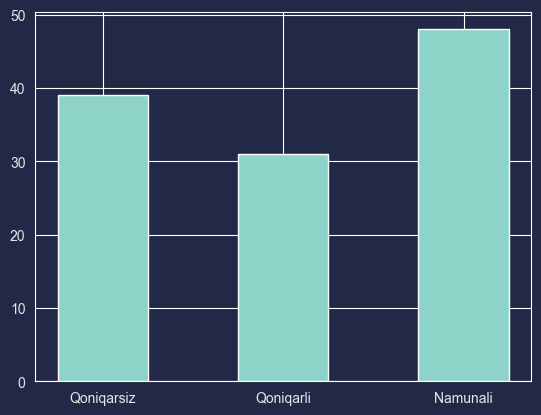

FileNotFoundError: [Errno 2] No such file or directory: "'/Users/student/PycharmProjects/Analiz_bot/bar.png'"

In [39]:
# Mentorni datasetini kirgazsa bar plot shaklida reaksiyani vizualizatsiya qiladi
def vizual_mentor_bar(data1):
    data2 = mentor_reaksiya_olish_df( data1 )
    plt.style.use("dark_background")
    for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
        plt.rcParams[param] = '0.9'  # very light grey
    for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
        plt.rcParams[param] = '#212946'  # bluish dark grey
        fig, ax.sub
    plt.bar( ["Qoniqarsiz", "Qoniqarli", "Namunali"], [ int ( data2.Qoniqarsiz.values ) , int(  data2.Qoniqarli.values ),
                                                      int( data2.Namunali.values )], 0.5 )
    plt.show()
    from matplotlib.backends.backend_pdf import PdfFile
    pdfile = PdfFile("'/Users/student/PycharmProjects/Analiz_bot/bar.png'")
    pdfile.savefig(plt, bbox_inches='tight', transparent=True)
Abdulaziz_data = date_get("Abdulaziz")
vizual_mentor_bar(Abdulaziz_data)

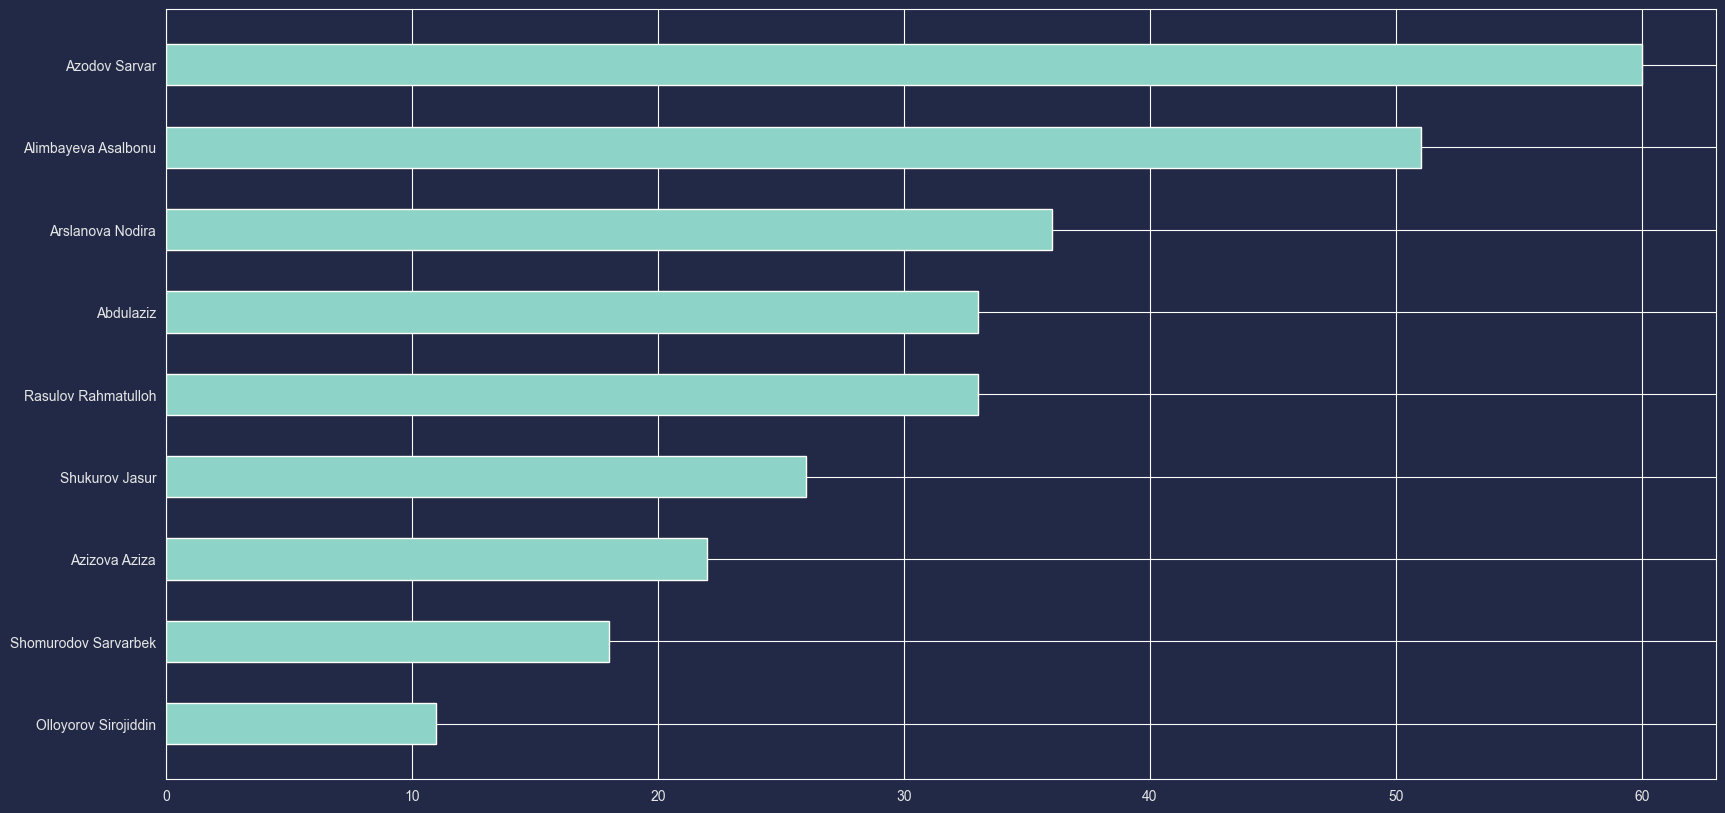

<Figure size 640x480 with 0 Axes>

In [33]:
def all_barh_mentors():
    data_dict = all_ball( left=None, right=None)
    sort = dict ( sorted( data_dict.items(), key = itemgetter(1), reverse = False ) )
    keys = list( sort.keys() )
    values = list (sort.values() )
    plt.style.use("dark_background")
    for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
        plt.rcParams[param] = '0.9'  # very light grey
    for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
        plt.rcParams[param] = '#212946'  # bluish dark grey
    plt.figure(figsize=(20, 10))
    plt.barh(keys, values , 0.5)
    plt.show()
    plt.savefig('/Users/student/PycharmProjects/Analiz_bot/barg_all.jpg', bbox_inches='tight', transparent=True)
all_barh_mentors()

In [34]:
# Kiritilgan sana boyicha harkunlik mentorni ballni olib beradi dict shaklida  ( keys=sana, values=ball )
def all_date_get_ball(mentor,left=None, right=None ):
    data_dict = {}
    data1 = date_get(mentor,left=left, right=right )
    data2 = data1.Date.unique()
    for x in data2:
        data_dict[x] = mentor_umumiy_hulosa_olish_ball( data1[data1["Date"] == x] )
    return data_dict

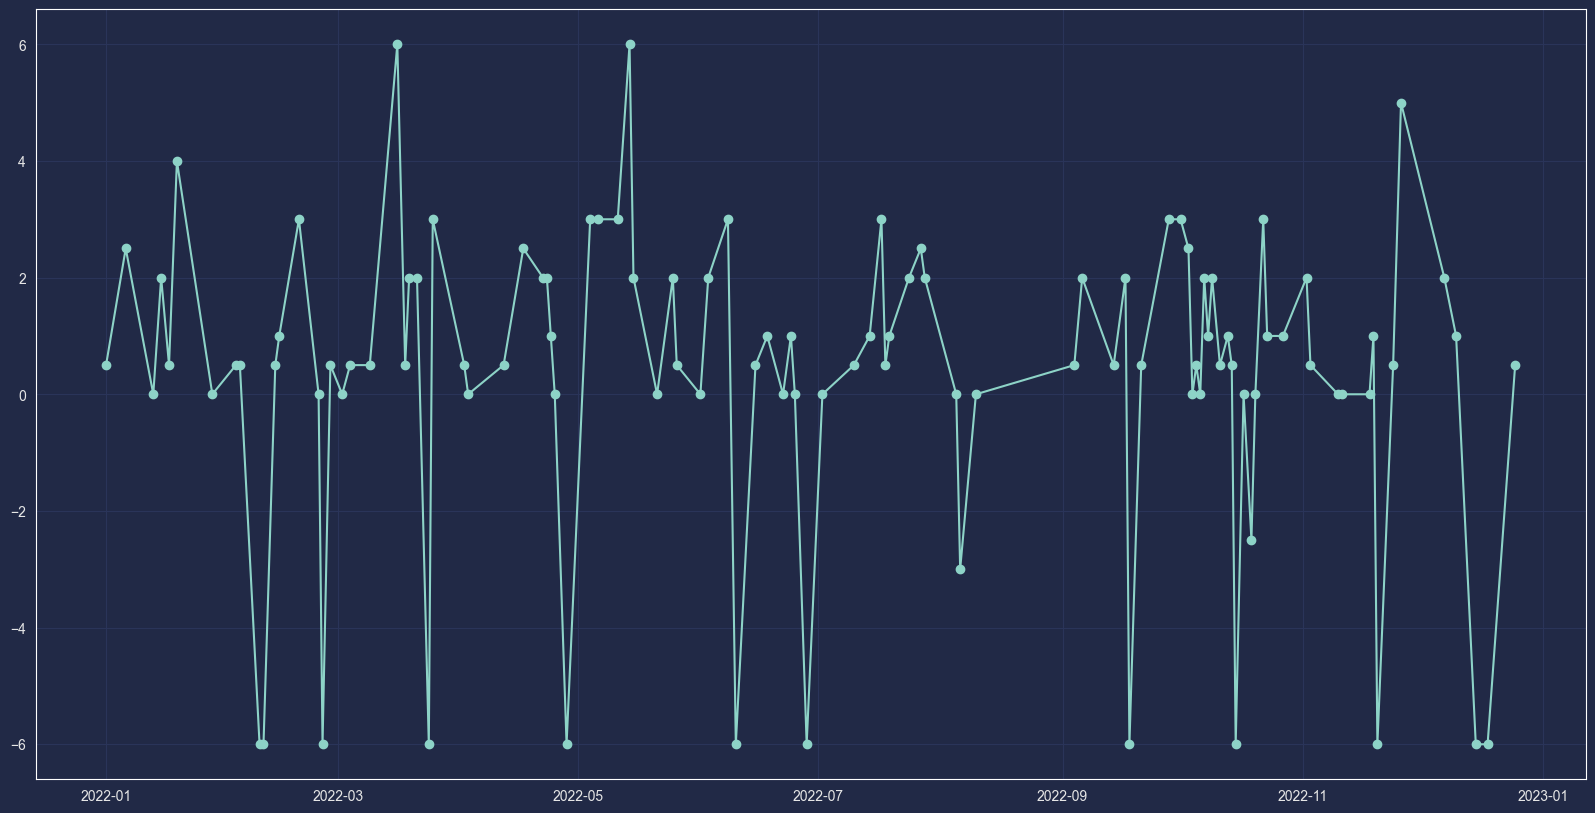

<Figure size 640x480 with 0 Axes>

In [16]:
# Mentorni vizualizatsiya qilish sana boyicha plot shaklida
def vizual_plot(mentor,left=None, right=None ):
    data_dict = all_date_get_ball(mentor,left=left, right=right )
    keys = list( data_dict.keys() )
    values = list( data_dict.values() )
    plt.style.use("dark_background")
    for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
        plt.rcParams[param] = '0.9'  # very light grey
    for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
        plt.rcParams[param] = '#212946'  # bluish dark grey
    plt.figure(figsize = (20, 10))
    plt.plot(keys, values,marker='o')
    plt.grid(color='#2A3459')
    plt.show()
    plt.savefig('/Users/student/PycharmProjects/Analiz_bot/plot.jpeg', bbox_inches='tight', transparent=True)
vizual_plot("Abdulaziz")

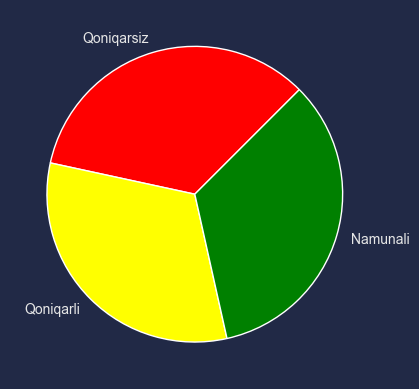

<Figure size 640x480 with 0 Axes>

In [17]:
def pie():
    data2 = mentor_reaksiya_olish_df( data )
    mycolors = ["red", "yellow", "green"]
    plt.pie( [ int ( data2.Qoniqarsiz.values ) , int(  data2.Qoniqarli.values ),
               int( data2.Namunali.values )],labels = ["Qoniqarsiz", "Qoniqarli", "Namunali"], startangle = 45, colors=mycolors )
    plt.show()
    # Uncomment this line to save the figure.
    plt.savefig('/Users/student/PycharmProjects/Analiz_bot/pie.png', bbox_inches='tight', transparent=True)
pie()

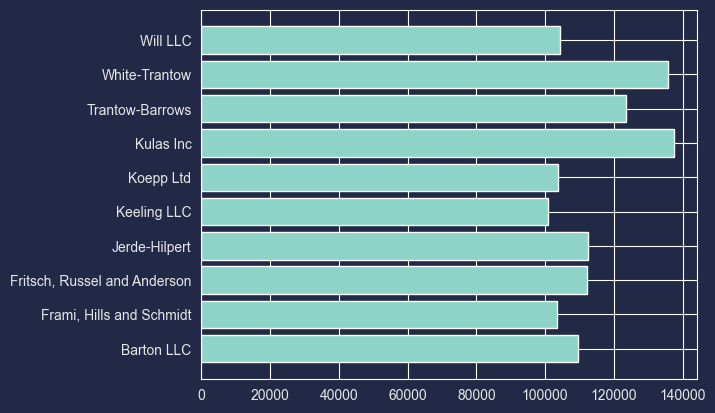

In [18]:
import numpy as np
import matplotlib.pyplot as plt


data = {'Barton LLC': 109438.50,
        'Frami, Hills and Schmidt': 103569.59,
        'Fritsch, Russel and Anderson': 112214.71,
        'Jerde-Hilpert': 112591.43,
        'Keeling LLC': 100934.30,
        'Koepp Ltd': 103660.54,
        'Kulas Inc': 137351.96,
        'Trantow-Barrows': 123381.38,
        'White-Trantow': 135841.99,
        'Will LLC': 104437.60}
group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)
fig, ax = plt.subplots()
ax.barh(group_names, group_data)
plt.savefig('/Users/student/PycharmProjects/Analiz_bot/sale_barh_.png', bbox_inches='tight', transparent=True)